# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("C:\\Users\\Anton\\Downloads\\archive\\creditcard.csv", index_col=0)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X = data.drop(columns=['Class'])
y = data['Class']

In [4]:
#!pip install sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=181)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [5]:
class ConstModel:
    def __init__(self, const):
        self.const = const
    
    def fit(self, X_train, y_train):
        pass

    def predict(self, x_test):
        return np.ones(x_test.shape[0]) * self.const

    def predict_proba(self, x_test):
        return np.concatenate(((np.ones(x_test.shape[0]) * (1 - self.const)).reshape((x_test.shape[0], 1)), self.predict(x_test).reshape((x_test.shape[0], 1))), axis=1)

In [6]:
# Функция возвращающая roc_auc. А также пичатает другие метрики если нужно
def roc_auc(model, print_all_metrics=False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_test_predicted = model.predict_proba(X_test)[:, 1]        
    y_train_predicted = model.predict_proba(X_train)[:, 1]
    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_test, y_test_predicted)
    plt.figure(figsize=(10,7))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()
    if(print_all_metrics):
        print(f'roc_auc: {roc_auc_score(y_test, y_test_predicted)}')
        print(f'accuracy: {accuracy_score(y_test, y_pred)}')
        print(f'precision: {precision_score(y_test, y_pred)}')
        print(f'recall: {recall_score(y_test, y_pred)}')
        print(f'f1_score: {f1_score(y_test, y_pred)}')
    return roc_auc_score(y_test, y_test_predicted)

In [7]:
log_model = LogisticRegression(max_iter=500, n_jobs=-1)
KNN_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

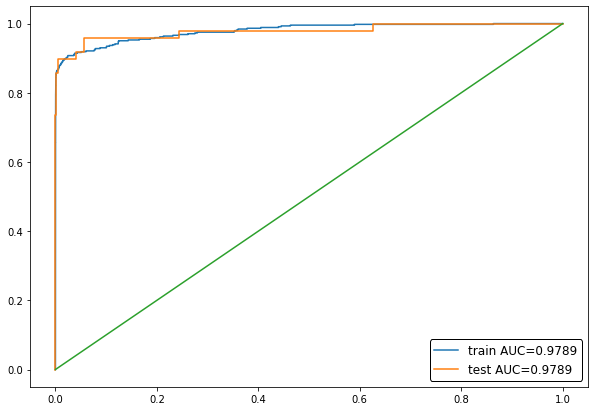

roc_auc: 0.978862563596063
accuracy: 0.9994382219725431
precision: 1.0
recall: 0.673469387755102
f1_score: 0.8048780487804877


In [8]:
roc_auc_log = roc_auc(log_model, print_all_metrics = True)

In [9]:
const_model0 = ConstModel(0)
const_model1 = ConstModel(1)

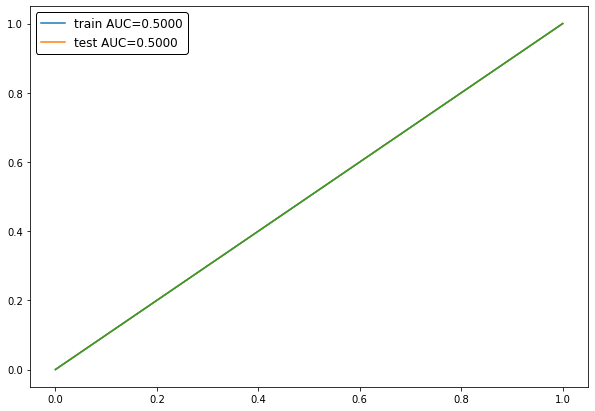

roc_auc: 0.5
accuracy: 0.0017204452090867595
precision: 0.0017204452090867595
recall: 1.0
f1_score: 0.0034349807220469685


In [10]:
roc_auc_const1 = roc_auc(const_model1, print_all_metrics = True)

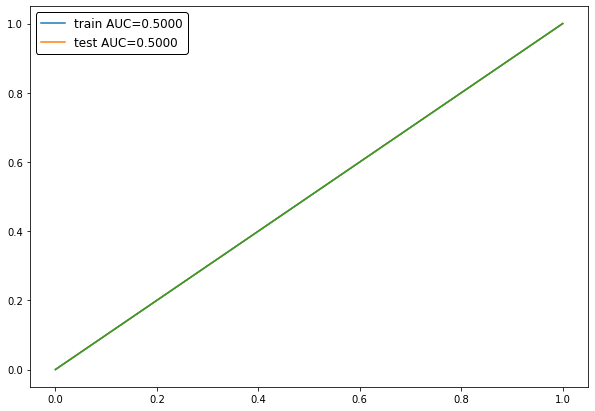

roc_auc: 0.5
accuracy: 0.9982795547909132
precision: 0.0
recall: 0.0
f1_score: 0.0


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
roc_auc_const0 = roc_auc(const_model0, print_all_metrics = True)

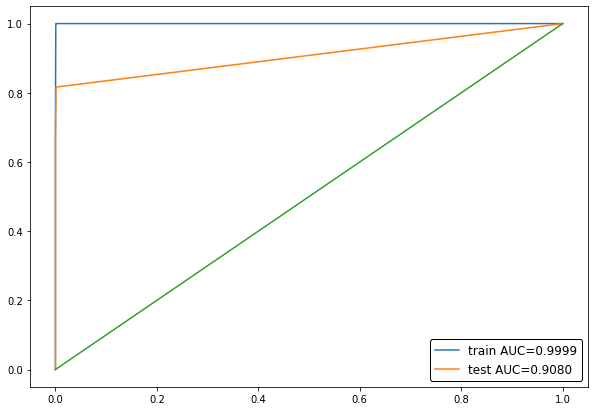

roc_auc: 0.9079640789911912
accuracy: 0.9992275552122467
precision: 0.9354838709677419
recall: 0.5918367346938775
f1_score: 0.7249999999999999


In [12]:
roc_auc_knn = roc_auc(KNN_model, print_all_metrics = True)

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Я выбрал roc_auc, так как только он использует непосредственно вероятности, а другие только сами предсказания, тем самым мы теряем информацию


### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

Да

In [13]:
log_models = [LogisticRegression(max_iter=iter, C=lr, n_jobs=-1) for lr in [0.1, 0.4, 0.7, 1] for iter in [500, 100, 1500, 2000]]
log_models

[LogisticRegression(C=0.1, max_iter=500, n_jobs=-1),
 LogisticRegression(C=0.1, n_jobs=-1),
 LogisticRegression(C=0.1, max_iter=1500, n_jobs=-1),
 LogisticRegression(C=0.1, max_iter=2000, n_jobs=-1),
 LogisticRegression(C=0.4, max_iter=500, n_jobs=-1),
 LogisticRegression(C=0.4, n_jobs=-1),
 LogisticRegression(C=0.4, max_iter=1500, n_jobs=-1),
 LogisticRegression(C=0.4, max_iter=2000, n_jobs=-1),
 LogisticRegression(C=0.7, max_iter=500, n_jobs=-1),
 LogisticRegression(C=0.7, n_jobs=-1),
 LogisticRegression(C=0.7, max_iter=1500, n_jobs=-1),
 LogisticRegression(C=0.7, max_iter=2000, n_jobs=-1),
 LogisticRegression(C=1, max_iter=500, n_jobs=-1),
 LogisticRegression(C=1, n_jobs=-1),
 LogisticRegression(C=1, max_iter=1500, n_jobs=-1),
 LogisticRegression(C=1, max_iter=2000, n_jobs=-1)]

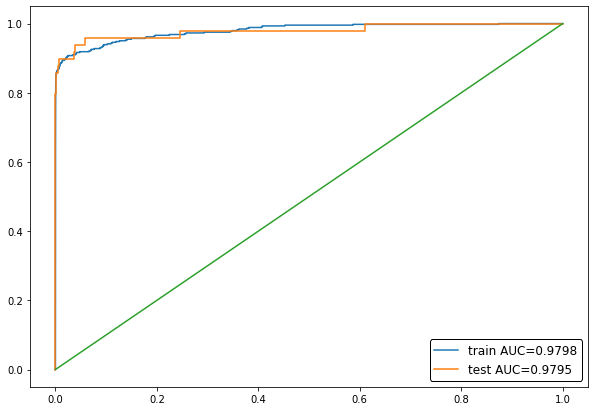

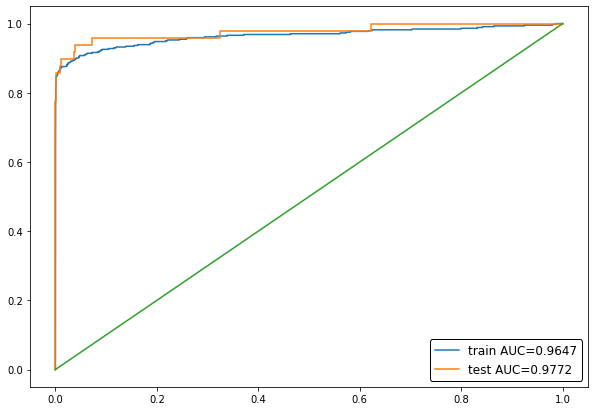

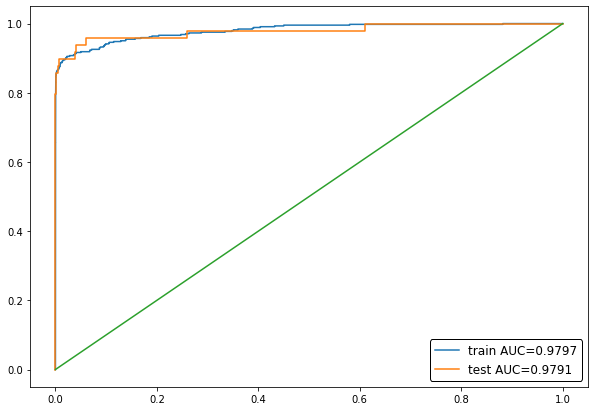

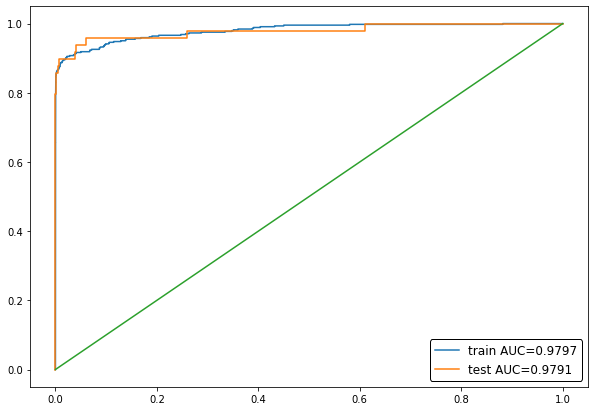

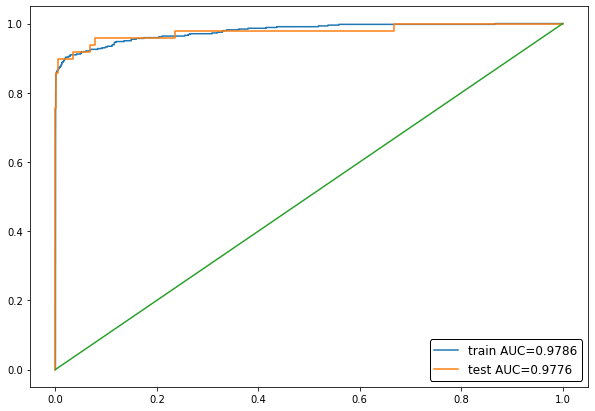

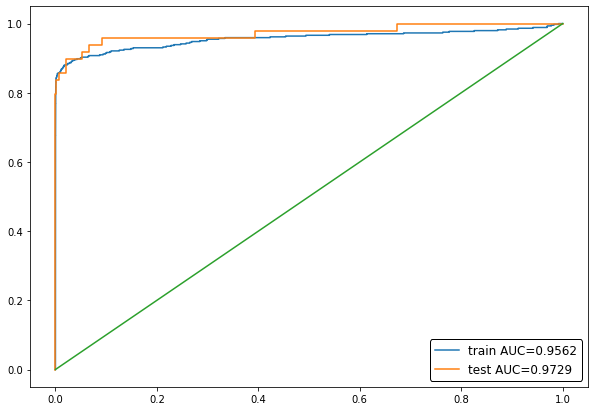

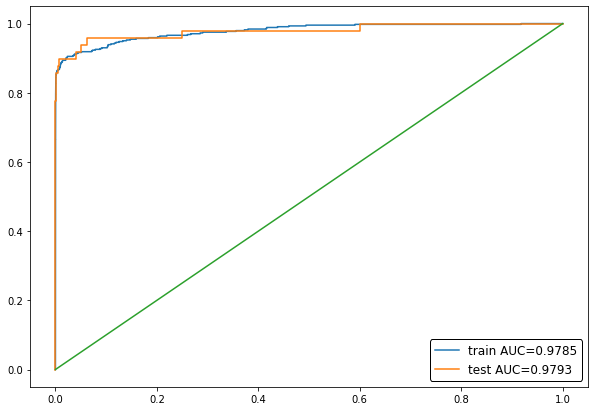

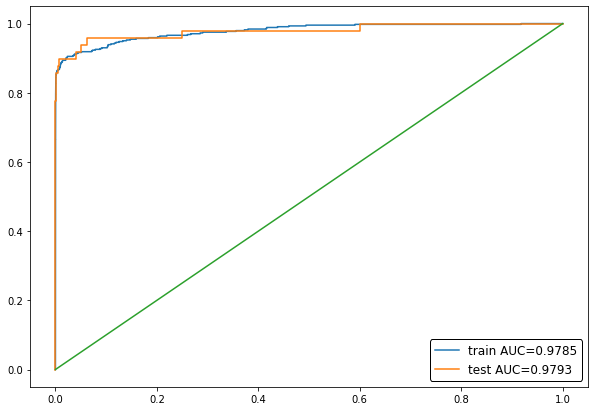

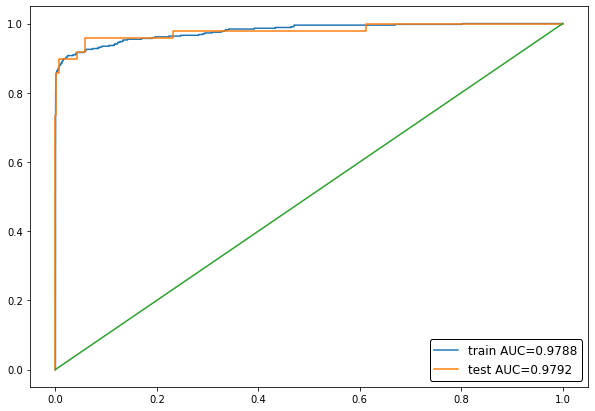

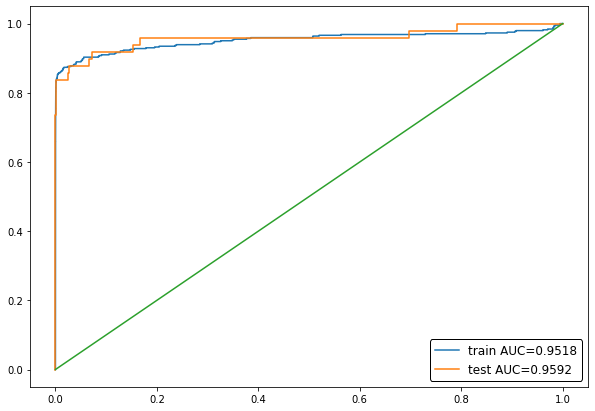

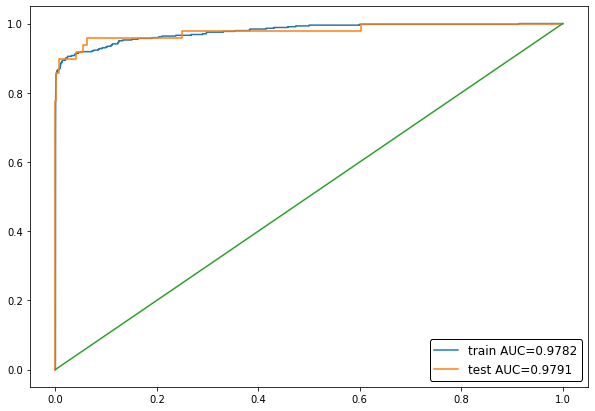

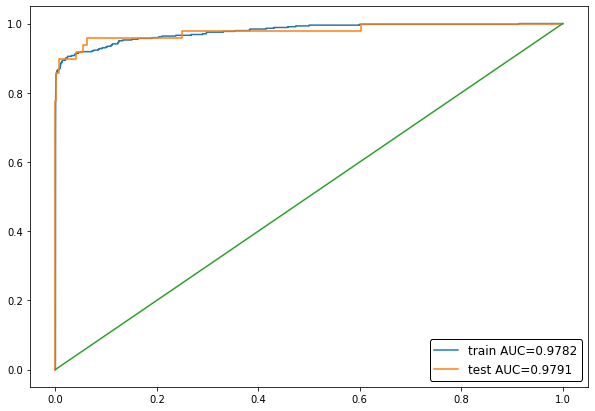

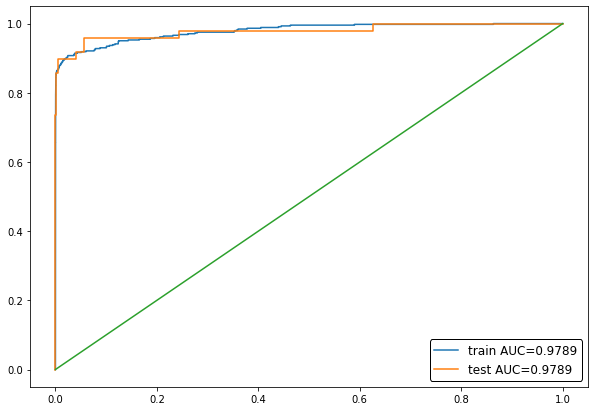

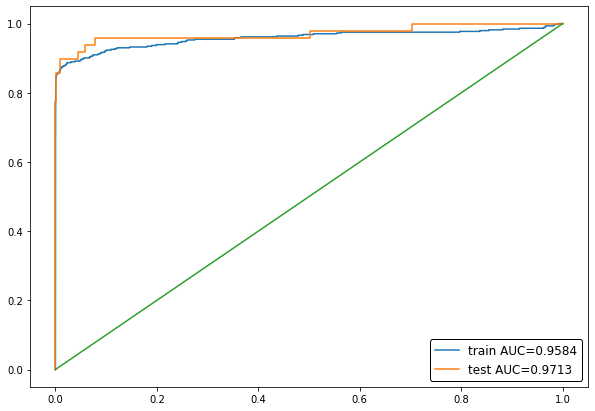

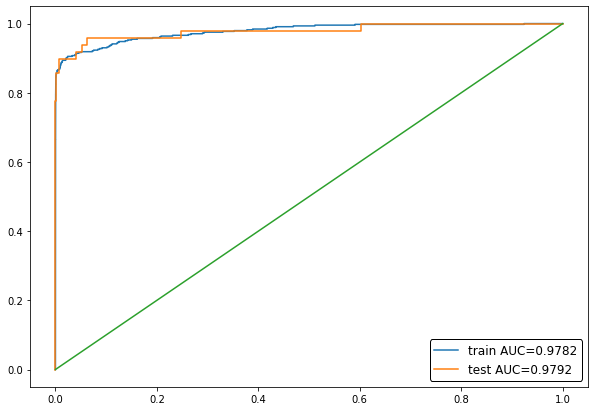

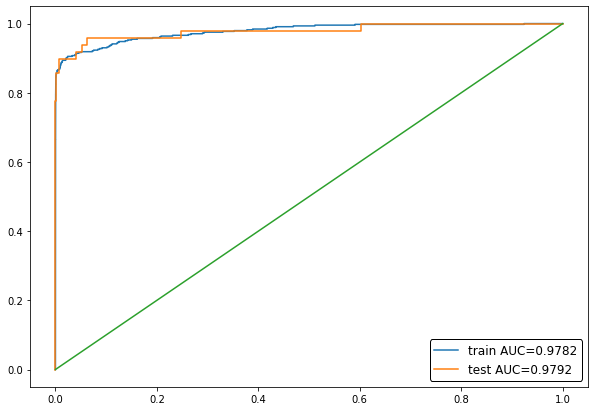

LogisticRegression(C=1, max_iter=2000, n_jobs=-1)


In [14]:
roc_auc_start = 0.4
for model in log_models:
    roc_auc_now = roc_auc(model)
    if (roc_auc_now < roc_auc_start):
        roc_auc_start = roc_auc_now
        best_log_model = model
print(model)

In [22]:
roc_auc_start = 0.4
for model in log_models:
    if (roc_auc_start < roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])):
        roc_auc_start = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        best_log_model = model
print(best_log_model)

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)


In [15]:
knn_models = [KNeighborsClassifier(n_neighbors=neib, n_jobs=-1) for neib in [4, 5, 6, 7]]
knn_models

[KNeighborsClassifier(n_jobs=-1, n_neighbors=4),
 KNeighborsClassifier(n_jobs=-1),
 KNeighborsClassifier(n_jobs=-1, n_neighbors=6),
 KNeighborsClassifier(n_jobs=-1, n_neighbors=7)]

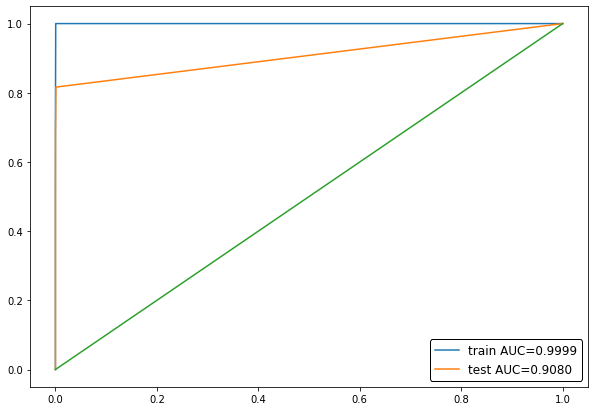

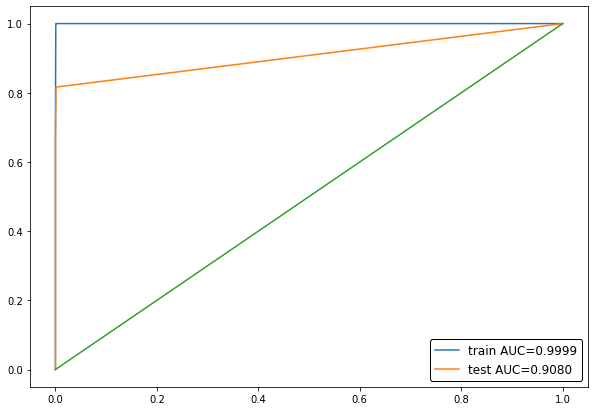

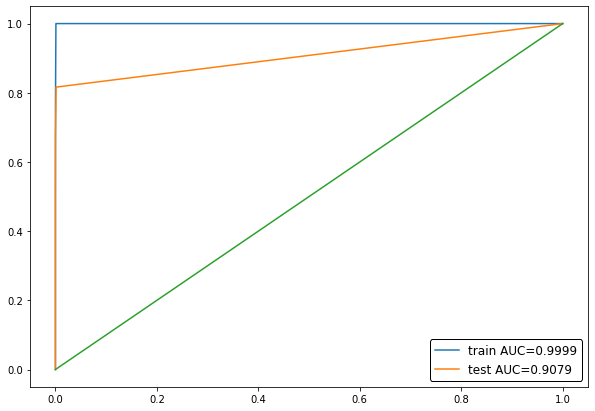

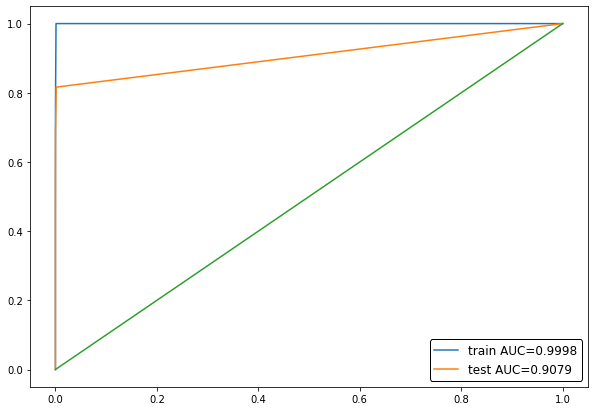

Лучшая модельKNeighborsClassifier(n_jobs=-1, n_neighbors=4)


In [23]:
roc_auc_start = 0.4
for model in knn_models:
    roc_auc_now = roc_auc(model)
    if (roc_auc_now > roc_auc_start):
        roc_auc_start = roc_auc_now
        best_knn_model = model
print(f'Лучшая модель{best_knn_model}')

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [39]:
df = pd.read_csv("C:\\work\\cf_dataset\\dataset.csv", sep=';')
df.head()

,A,B,C,D,E,F,rank
0,498,976,1386,1792,1188,1170,International Grandmaster
1,498,980,1428,1800,1146,1152,International Grandmaster
2,496,980,1428,1808,1146,1146,Legendary Grandmaster
3,496,968,1392,1712,1182,1182,Master
4,438,964,1392,1606,1210,1260,Expert


Я взял за датасет, быллы за задачи на codeforces, одного из контестов(https://codeforces.com/contest/1632). 
И я хочу предсказывать ранги участников по их баллам за задачи. Я его от части сам скноструировал, там можно брать данные но только в JSON, а также в информации о контесте нет ранга, так что пришлось отдельно для пользователей искать ранги(я делал руками по 500 штук). Но как-бы это не очень руками, но какую-то работу я всё равно сделал. Просто есть шанс, что зависимость не особо будет, чтобы вы понимали, что что-то я сделал

In [40]:
X = df.drop(columns=['rank'])
y = df['rank']
indexes = {}
last = 0
for i in range(len(y)):
    if (y[i] not in indexes):
        indexes[y[i]] = last
        last += 1
    y[i] = indexes[y[i]]
y = y.astype('int')
X = X.astype('int')

C:\Users\Anton\AppData\Local\Temp\ipykernel_15908\2547536976.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = indexes[y[i]]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=181)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [75]:
# Функция возвращающая f1. А также пичатает другие метрики если нужно
def f1_not_bin(model, print_all_metrics=False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)    
    if(print_all_metrics):
        print(f'accuracy: {accuracy_score(y_test, y_pred)}')
        print(f'precision macro: {precision_score(y_test, y_pred, average="macro")}')
        print(f'recall macro: {recall_score(y_test, y_pred, average="macro")}')
        print(f'precision weighted: {precision_score(y_test, y_pred, average="weighted")}')
        print(f'recall weighted: {recall_score(y_test, y_pred, average="weighted")}')
    return f1_score(y_test, y_pred, average='weighted')

In [76]:
log_reg = LogisticRegression(max_iter=1000)
f1_log_cf = f1_not_bin(log_reg, print_all_metrics=True)
print(f'f1_score weighted: {f1_log_cf}')

accuracy: 0.37723214285714285
precision macro: 0.13276192184551414
recall macro: 0.19929350114630606
precision weighted: 0.2394102626611159
recall weighted: 0.37723214285714285
f1_score weighted: 0.28123899559823934


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetr

Какой-то из классов вообще не предсказываеться, поэтому и есть эти предупреждения. Наверное стоило, сделать поменьше классов, и не различать гроссмейстеров например.

In [77]:
knn_model = KNeighborsClassifier(n_neighbors=5)
f1_knn_cf = f1_not_bin(knn_model, print_all_metrics=True)
print(f'f1_score weighted: {f1_knn_cf}')

accuracy: 0.33035714285714285
precision macro: 0.25305685668917693
recall macro: 0.23649970438712753
precision weighted: 0.3154223474463996
recall weighted: 0.33035714285714285
f1_score weighted: 0.31124205322474047


In [79]:
def void_f1_not_bin(model, print_all_metrics=False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)    
    if(print_all_metrics):
        print(f'accuracy: {accuracy_score(y_test, y_pred)}')
        print(f'precision macro: {precision_score(y_test, y_pred, average="macro")}')
        print(f'recall macro: {recall_score(y_test, y_pred, average="macro")}')
        print(f'precision weighted: {precision_score(y_test, y_pred, average="weighted")}')
        print(f'recall weighted: {recall_score(y_test, y_pred, average="weighted")}')

In [80]:
f1_consts = []
for i in range(10):
    const_model = ConstModel(i)
    print(str(i) + ":")
    void_f1_not_bin(const_model, print_all_metrics=True)

0:
accuracy: 0.004464285714285714
precision macro: 0.000496031746031746
recall macro: 0.1111111111111111
precision weighted: 1.992984693877551e-05
recall weighted: 0.004464285714285714
1:
accuracy: 0.0
precision macro: 0.0
recall macro: 0.0
precision weighted: 0.0
recall weighted: 0.0
2:
accuracy: 0.06473214285714286
precision macro: 0.007192460317460318
recall macro: 0.1111111111111111
precision weighted: 0.0041902503188775515
recall weighted: 0.06473214285714286
3:
accuracy: 0.29910714285714285
precision macro: 0.033234126984126984
recall macro: 0.1111111111111111
precision weighted: 0.08946508290816325
recall weighted: 0.29910714285714285
4:
accuracy: 0.017857142857142856
precision macro: 0.001984126984126984
recall macro: 0.1111111111111111
precision weighted: 0.00031887755102040814
recall weighted: 0.017857142857142856
5:
accuracy: 0.08482142857142858
precision macro: 0.009424603174603176
recall macro: 0.1111111111111111
precision weighted: 0.00719467474489796
recall weighted: 0.0

c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\User

Ну здесть сново такая-же проблема, однако итак видно, что константа хуже и регрессии и KNN

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Я выберу  регрессию, а также f1. Так у регрессии больше гипер_параметров и больше шанс на успех. F1 комбинирует в себе recall и precision, а accuracy игнорирует то в какую сторону мы ошиблись

In [83]:
count = np.zeros(10)
for elem in y_train:
    count[elem] += 1
weight = y.shape / count
dict_weight = {}
for i in range(10):
    dict_weight[i] = weight[i];

In [84]:
log_reg = LogisticRegression(max_iter=1000, class_weight=dict_weight)
f1_log_cf = f1_not_bin(log_reg, print_all_metrics=True)
print(f'f1_score weighted: {f1_log_cf}')

accuracy: 0.26339285714285715
precision macro: 0.17286140364845334
recall macro: 0.1673545046720007
precision weighted: 0.3639505653682661
recall weighted: 0.26339285714285715
f1_score weighted: 0.23619261803808755


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarnin

Стало только хуже, попробуем теперь перебрать C и max_iter

In [85]:
best = 0
for iter in [500, 1000, 1500, 2000]:
    for c in [0.8, 0.9, 1, 1.1]:
        print(f'Iter: {iter}, C : {c}')
        model = LogisticRegression(max_iter=iter, C=c)
        f1_log_cf_it = f1_not_bin(model, print_all_metrics=True)
        print(f'f1_score weighted: {f1_log_cf_it}')
        if (f1_log_cf_it > best):
            best_model_log = model
            best = f1_log_cf_it

Iter: 500, C : 0.8


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetr

accuracy: 0.36160714285714285
precision macro: 0.12894648163465366
recall macro: 0.1935143162626436
precision weighted: 0.2292056845484265
recall weighted: 0.36160714285714285
f1_score weighted: 0.26438861592752333
Iter: 500, C : 0.9


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetr

accuracy: 0.36160714285714285
precision macro: 0.12894648163465366
recall macro: 0.1935143162626436
precision weighted: 0.2292056845484265
recall weighted: 0.36160714285714285
f1_score weighted: 0.26438861592752333
Iter: 500, C : 1


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetr

accuracy: 0.36160714285714285
precision macro: 0.12872692188143892
recall macro: 0.1935143162626436
precision weighted: 0.2286092313629544
recall weighted: 0.36160714285714285
f1_score weighted: 0.26432316974408815
Iter: 500, C : 1.1


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetr

accuracy: 0.36160714285714285
precision macro: 0.12872692188143892
recall macro: 0.1935143162626436
precision weighted: 0.2286092313629544
recall weighted: 0.36160714285714285
f1_score weighted: 0.26432316974408815
Iter: 1000, C : 0.8


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetr

accuracy: 0.3705357142857143
precision macro: 0.1316872161836009
recall macro: 0.19686875618424768
precision weighted: 0.23655686663821016
recall weighted: 0.3705357142857143
f1_score weighted: 0.2709994139464412
Iter: 1000, C : 0.9
accuracy: 0.37723214285714285
precision macro: 0.13366161827073877
recall macro: 0.19934375492790313
precision weighted: 0.2418532565086922
recall weighted: 0.37723214285714285
f1_score weighted: 0.2786674451092654
Iter: 1000, C : 1


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prep

accuracy: 0.37723214285714285
precision macro: 0.13276192184551414
recall macro: 0.19929350114630606
precision weighted: 0.2394102626611159
recall weighted: 0.37723214285714285
f1_score weighted: 0.28123899559823934
Iter: 1000, C : 1.1


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetr

accuracy: 0.37276785714285715
precision macro: 0.1320284427119304
recall macro: 0.19766025324440145
precision weighted: 0.2374636211294827
recall weighted: 0.37276785714285715
f1_score weighted: 0.27562539550704007
Iter: 1500, C : 0.8


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetr

accuracy: 0.37723214285714285
precision macro: 0.13333126568420686
recall macro: 0.1993563183733024
precision weighted: 0.24095503586049802
recall weighted: 0.37723214285714285
f1_score weighted: 0.2777383977306337
Iter: 1500, C : 0.9
accuracy: 0.37723214285714285
precision macro: 0.13366161827073877
recall macro: 0.19934375492790313
precision weighted: 0.2418532565086922
recall weighted: 0.37723214285714285
f1_score weighted: 0.2786674451092654
Iter: 1500, C : 1


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prep

accuracy: 0.3705357142857143
precision macro: 0.13096384575257816
recall macro: 0.19674312173025502
precision weighted: 0.2345934581850075
recall weighted: 0.3705357142857143
f1_score weighted: 0.27805139663821654
Iter: 1500, C : 1.1


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetr

accuracy: 0.37276785714285715
precision macro: 0.1320284427119304
recall macro: 0.19766025324440145
precision weighted: 0.2374636211294827
recall weighted: 0.37276785714285715
f1_score weighted: 0.27562539550704007
Iter: 2000, C : 0.8
accuracy: 0.37276785714285715
precision macro: 0.21434477956217085
recall macro: 0.20188147722887814
precision weighted: 0.30520466118292205
recall weighted: 0.37276785714285715
f1_score weighted: 0.2894649628438911
Iter: 2000, C : 0.9


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.37723214285714285
precision macro: 0.13366161827073877
recall macro: 0.19934375492790313
precision weighted: 0.2418532565086922
recall weighted: 0.37723214285714285
f1_score weighted: 0.2786674451092654
Iter: 2000, C : 1


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prep

accuracy: 0.3705357142857143
precision macro: 0.17117500652903772
recall macro: 0.1974028723900057
precision weighted: 0.26694520429257823
recall weighted: 0.3705357142857143
f1_score weighted: 0.2815228369055807
Iter: 2000, C : 1.1
accuracy: 0.3705357142857143
precision macro: 0.13096384575257816
recall macro: 0.19674312173025502
precision weighted: 0.2345934581850075
recall weighted: 0.3705357142857143
f1_score weighted: 0.27805139663821654


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetr

In [87]:
print(best_model_log)
f1_log_cf_it = f1_not_bin(model, print_all_metrics=True)
print(f'f1_score weighted: {f1_log_cf_it}')

LogisticRegression(C=0.8, max_iter=2000)
accuracy: 0.3705357142857143
precision macro: 0.13096384575257816
recall macro: 0.19674312173025502
precision weighted: 0.2345934581850075
recall weighted: 0.3705357142857143
f1_score weighted: 0.27805139663821654


c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetr

Нуууу, результаты конечно оставляют желать лучшего. Всё-таки надо было сделать классов поменьше, или взять больше данных. Но я и с этими 2 часа возился.
Попробуем перебрать число соседей в KNN

In [93]:
best = 0
res = []
for n in [4, 5, 6, 7, 8, 9, 10]:
    print(f'n: {n}')
    model = KNeighborsClassifier(n_neighbors=n)
    f1_log_cf_it = f1_not_bin(model)
    print(f'f1_score weighted: {f1_log_cf_it}')
    res.append(f1_log_cf_it)
    if (f1_log_cf_it > best):
        best_model_knn = model
        best = f1_log_cf_it

n: 4
f1_score weighted: 0.32700730123296046
n: 5
f1_score weighted: 0.31124205322474047
n: 6
f1_score weighted: 0.3243851638242824
n: 7
f1_score weighted: 0.34985585758513577
n: 8
f1_score weighted: 0.33510787651870233
n: 9
f1_score weighted: 0.3379671351466102
n: 10
f1_score weighted: 0.33410265276841017


In [94]:
print(best_model_knn)

KNeighborsClassifier(n_neighbors=7)


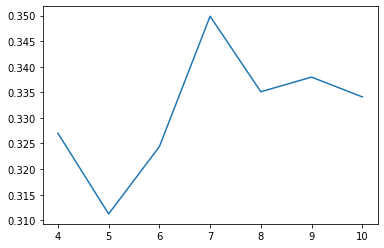

In [95]:
plt.plot(np.arange(4, 11, 1), np.array(res))
plt.show()

Ну тут лучше конечно, до идела как до небес, да какой до идеала, до адекватности.
По-мимо относительно маленькой выборки и маленького различие в похожих классах, могу предположить, что много людей используют фейки и поэтому происходит много выбросов.
Вобщем, это наверное всё.

    

Вот как я делал Датасеты. А data1-11, contest-info, я получил отсюда
https://codeforces.com/apiHelp

In [ ]:
#НЕ ЗАПУСКАТЬ
fin = open("contest_info.csv", "r")
fin2 = open("handle_rank.csv", "r")
fout1 = open("dataset_with_handle.csv", "w")
fout2 = open("dataset.csv", "w")
s = fin2.readline()
d2 = {'эксперт' : 'Expert', 'международный гроссмейстер' : 'International Grandmaster', 'гроссмейстер' : 'Grandmaster',
     'легендарный гроссмейстер' : 'Legendary Grandmaster', 'кандидат в мастера' : 'Candidate Master', 'ученик' : 
     'Pupil', 'новичок' : 'Newbie', 'специалист' : 'Specialist', 'международный мастер' : 'International Master	', 'мастер' : 'Master'}
d = {}
for line in fin2:
    try:
        info = line.rstrip().split(';')
        d[info[0]] = d2[info[1]]
    except:
        pass
names = []
points = []
s = fin.readline()
for line in fin:
    info = line.rstrip().split(';')
    if (info[0] != ""):
        names.append(info[0])
        points.append([])
    points[-1].append(info[1][:-2])
fout1.write("handle;A;B;C;D;E;F;rank\n")
fout2.write("A;B;C;D;E;F;rank\n")
for i in range(len(names)):
    try:
        for j in range(6 - len(points[i])):
            points[i].append(0)
        fout1.write(names[i] + ";" + ";".join(points[i]) + ";" + d[names[i]] + '\n')
        fout2.write(";".join(points[i]) + ";" + d[names[i]] + '\n')
    except:
        pass

fin.close()
fin2.close()
fout1.close()
fout2.close()

In [ ]:
#НЕ ЗАПУСКАТЬ
f1 = open("data1.csv", "r")
f2 = open("data2.csv", "r")
f3 = open("data3.csv", "r")
f4 = open("data4.csv", "r")
f5 = open("data5.csv", "r")
f6 = open("data6.csv", "r")
f7 = open("data7.csv", "r")
f8 = open("data8.csv", "r")
f9 = open("data9.csv", "r")
f10 = open("data10.csv", "r")
f11 = open("data11.csv", "r")
fout = open("handle_rank.csv", "w")
fout.write("handle;rank\n")
files = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11]
for file in files:
    s = file.readline()
    for line in file:
        fout.write(line)
    file.close()
fout.close()